In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors 
import tqdm
from scipy.integrate import simps, dblquad

from scipy.interpolate import griddata, SmoothSphereBivariateSpline, Rbf


sys.path.append('../my_funcs/')
from pipeline_main import pipeline
from pipeline_streamers import infall_sphere 


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4855/4855 [00:13<00:00, 349.66it/s]


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4855/4855 [00:13<00:00, 360.67it/s]


Converged mean angular momentum vector after 0 iteration(s)
Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4855/4855 [00:00<00:00, 14286.18it/s]


Disk size: 145.1 au


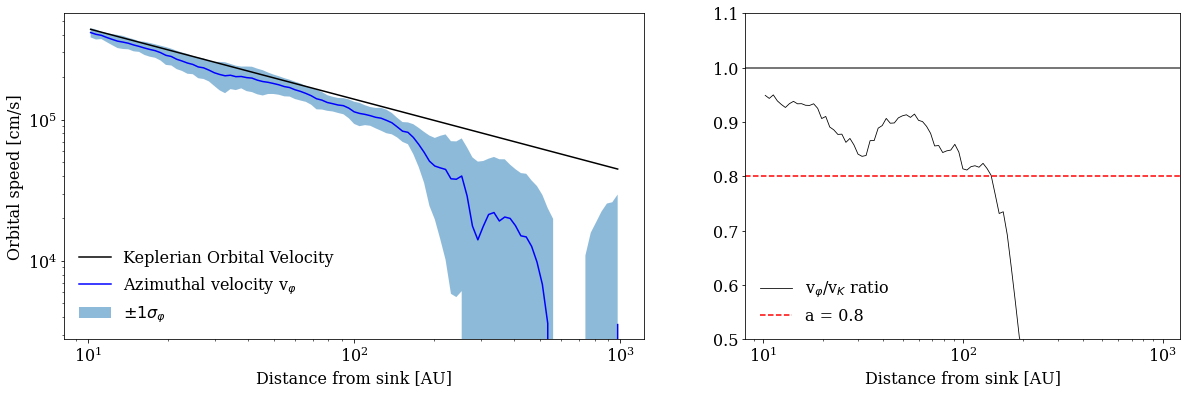

In [2]:
datai = pipeline(snap = 404, run = 'sink178core03', sink_id=178)
data = pipeline(snap = 535, run = 'sink178core03', sink_id=178)
data.recalc_L(verbose = 1); 
data.calc_disksize()

In [3]:
first_snap = 404
last_snap = 535
step = (last_snap - first_snap) / 3 
print(step)
snapshots = np.arange(first_snap, last_snap + 1, step).astype(int); 
snapshots

43.666666666666664


array([404, 447, 491, 535])

In [4]:
hammer_data = {}
snap_time = np.zeros_like(snapshots)
for i, sh in enumerate(snapshots):
    data = pipeline(snap = sh, run = 'sink178core03', sink_id=178)
    data.recalc_L(verbose = 0); data.calc_disksize(plot=False, verbose = 0)
    hammer_data[sh] = data.infall_sphere(shell_r=50, range_plot=1e-8, linear_threshold=1e-12, get_data=True, plot = False, verbose = 0)
    snap_time[i] = data.time - datai.time

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4855/4855 [00:00<00:00, 12678.39it/s]
/lustre/hpc/astro/kxm508/codes/dispatch2/experiments/ISM/python/streamers/../my_funcs/pipeline_main.py:251: RuntimeWarning: invalid value encountered in true_divide
  self.vφ = (h_vφ_tot/h_mass_tot) * self.cms_velocity;
/lustre/hpc/astro/kxm508/codes/dispatch2/experiments/ISM/python/streamers/../my_funcs/pipeline_main.py:252: RuntimeWarning: invalid value encountered in true_divide
  self.vφ2 = (h_vφ_tot2/h_mass_tot) * self.cms_velocity**2;
100%|██████████| 4855/4855 [00:03<00:00, 1257.43it/s]


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4855/4855 [00:00<00:00, 13241.73it/s]
/lustre/hpc/astro/kxm508/codes/dispatch2/experiments/ISM/python/streamers/../my_funcs/pipeline_main.py:251: RuntimeWarning: invalid value encountered in true_divide
  self.vφ = (h_vφ_tot/h_mass_tot) * self.cms_velocity;
/lustre/hpc/astro/kxm508/codes/dispatch2/experiments/ISM/python/streamers/../my_funcs/pipeline_main.py:252: RuntimeWarning: invalid value encountered in true_divide
  self.vφ2 = (h_vφ_tot2/h_mass_tot) * self.cms_velocity**2;
100%|██████████| 4855/4855 [00:03<00:00, 1224.70it/s]


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4855/4855 [00:00<00:00, 15122.25it/s]
/lustre/hpc/astro/kxm508/codes/dispatch2/experiments/ISM/python/streamers/../my_funcs/pipeline_main.py:251: RuntimeWarning: invalid value encountered in true_divide
  self.vφ = (h_vφ_tot/h_mass_tot) * self.cms_velocity;
/lustre/hpc/astro/kxm508/codes/dispatch2/experiments/ISM/python/streamers/../my_funcs/pipeline_main.py:252: RuntimeWarning: invalid value encountered in true_divide
  self.vφ2 = (h_vφ_tot2/h_mass_tot) * self.cms_velocity**2;
100%|██████████| 4855/4855 [00:03<00:00, 1334.25it/s]


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4855/4855 [00:03<00:00, 1322.52it/s]


In [5]:
range_plot = 1e-9; linear_threshold = 1e-13;

TypeError: Dimensions of C (359, 179) are incompatible with X (64261) and/or Y (64261); see help(pcolormesh)

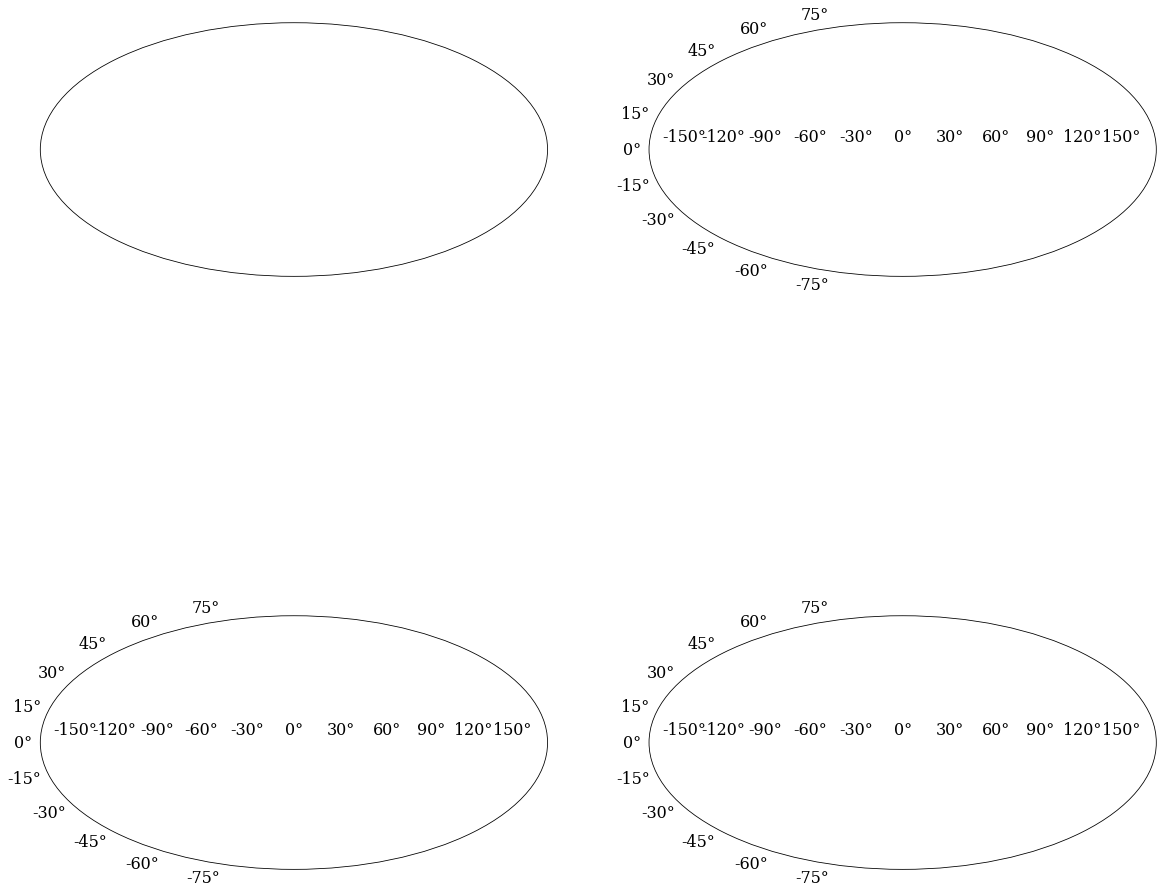

In [6]:
fig, axs = plt.subplots(2,2, figsize = (20,20), subplot_kw={'projection': 'hammer'})

for i, sn in zip(range(len(snapshots)), hammer_data):

    lon,lat, proj_data, total_infall = hammer_data[sn]
    Lon , Lat = np.meshgrid(lon,lat, indexing = 'ij')
    ax = axs.flatten()[i]
    ax.set_yticks([]); ax.set_xticks([])
    im = ax.pcolormesh(Lon, Lat, proj_data, cmap='coolwarm', snap = True, norm=colors.SymLogNorm(linthresh = linear_threshold, linscale = 0.5, vmin = -range_plot, vmax = range_plot), shading = 'gouraud')
    ax.set_title(f'T = {snap_time[i]/1e3:1.2f} kyr, Total infall: {total_infall*1e6:2.1f} 10$^{{-6}}$ M$_\odot$/yr')

   
fig.subplots_adjust(wspace=0, hspace=0.5)
cbar = fig.colorbar(im, ax=axs.ravel().tolist(), fraction = 0.1, pad = -0.38, location = 'bottom')
cbar.set_label('Mass accretion per area [M$_\odot$au$^{-2}$yr$^{-1}$]', labelpad = -70, rotation = 0, fontsize = 20)
plt.tight_layout()
#plt.savefig(f'graphics/hammer_timeevolution', facecolor='w', dpi = 500)